In [9]:
import pandas as pd
df=pd.read_excel('3_ev_market_india_dataset.xlsx')

In [10]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [12]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


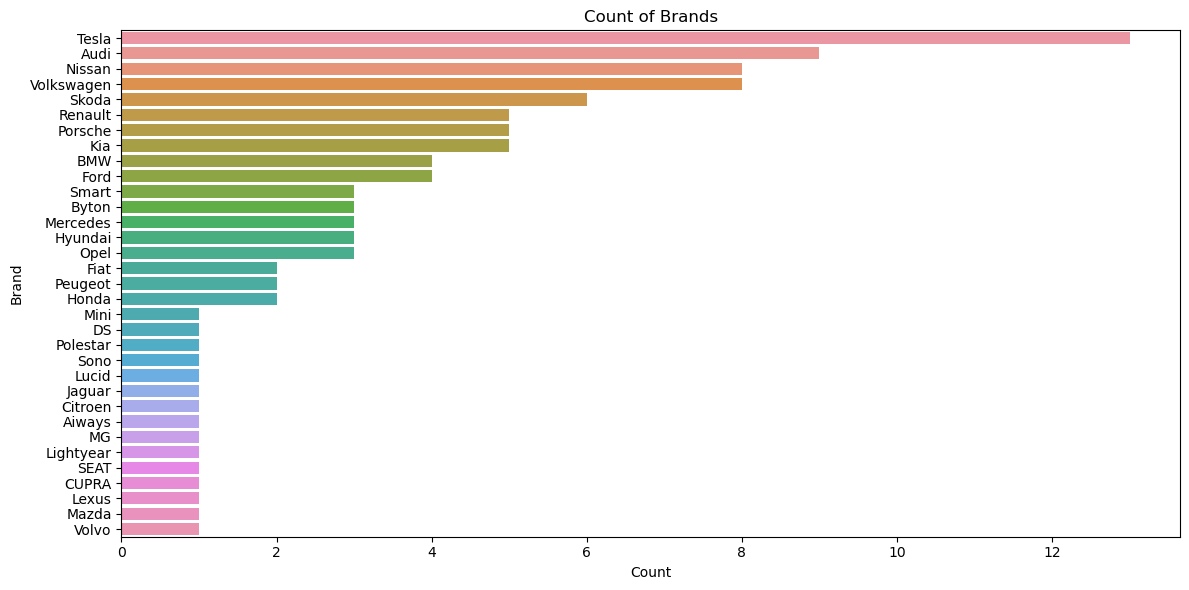

In [13]:
brand_counts = df['Brand'].value_counts()

# Bar graph for Brand counts
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand', data=df, order=brand_counts.index)
plt.title('Count of Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()


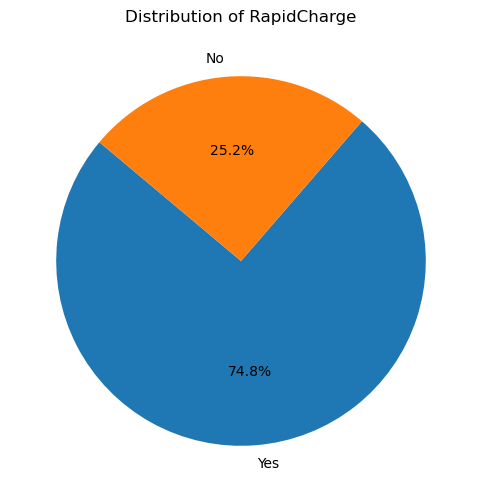

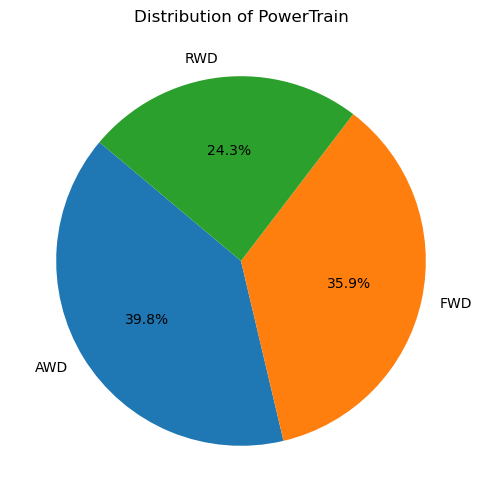

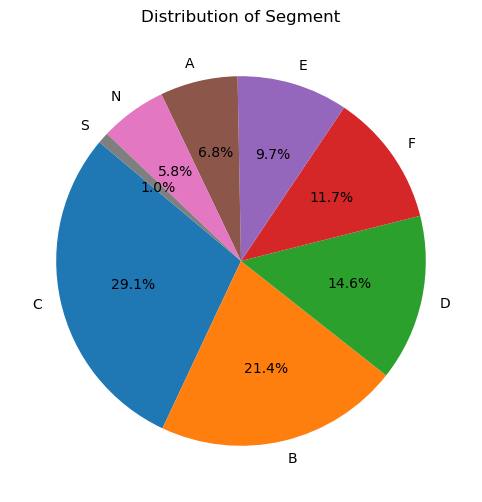

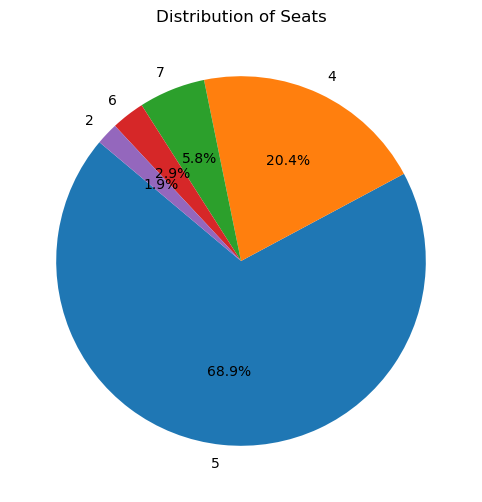

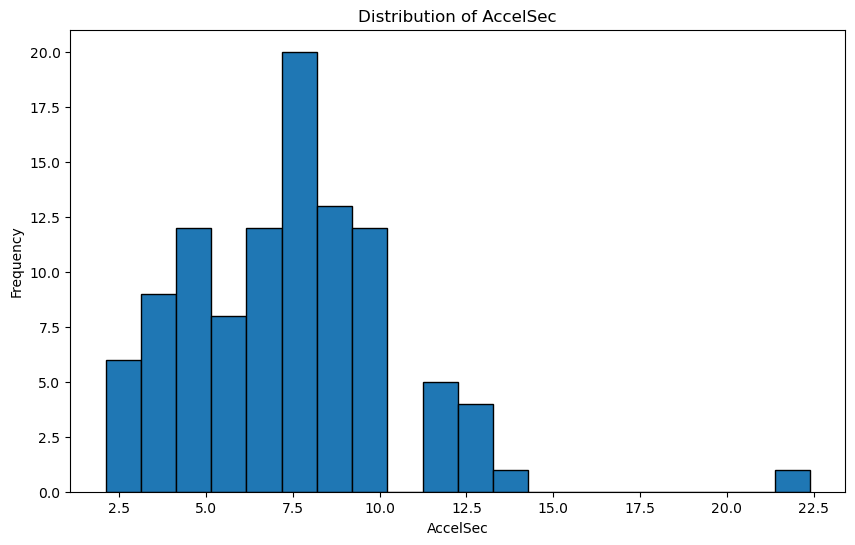

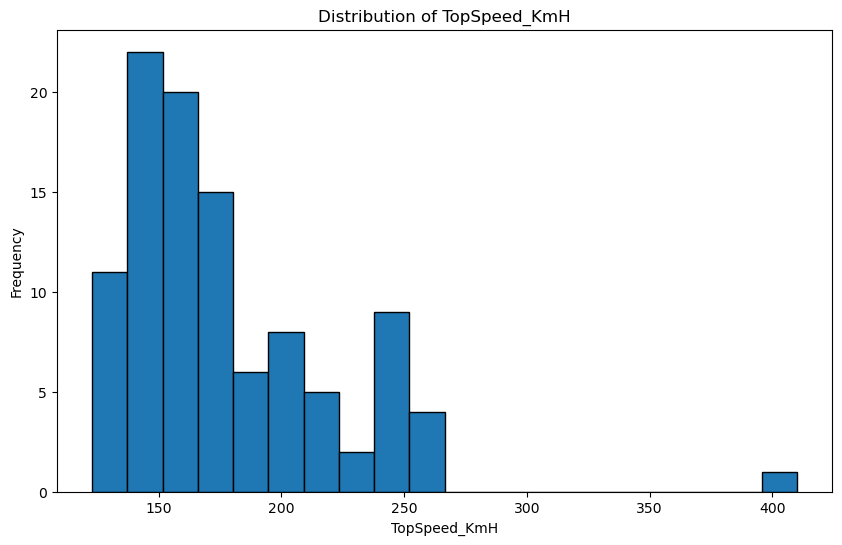

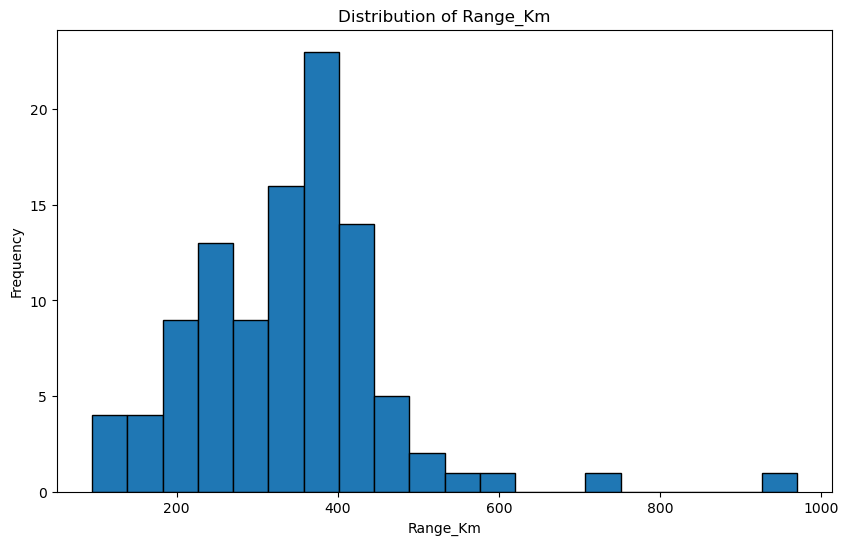

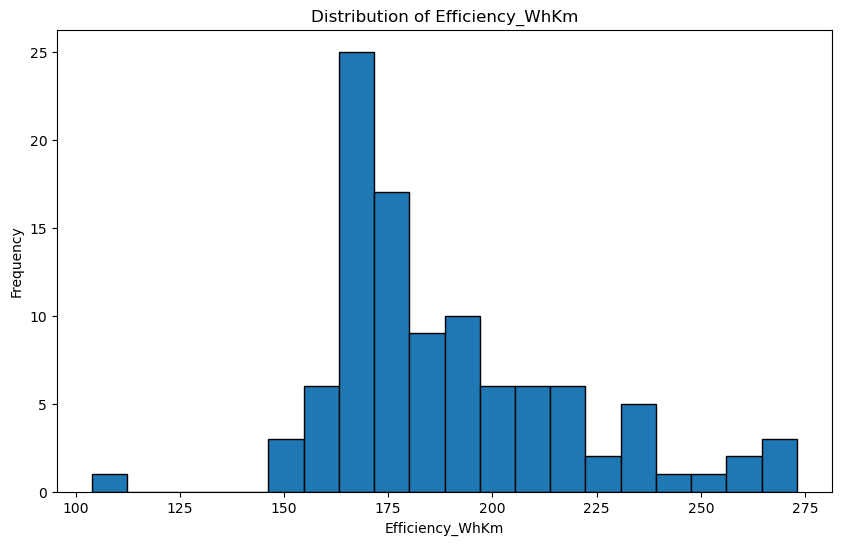

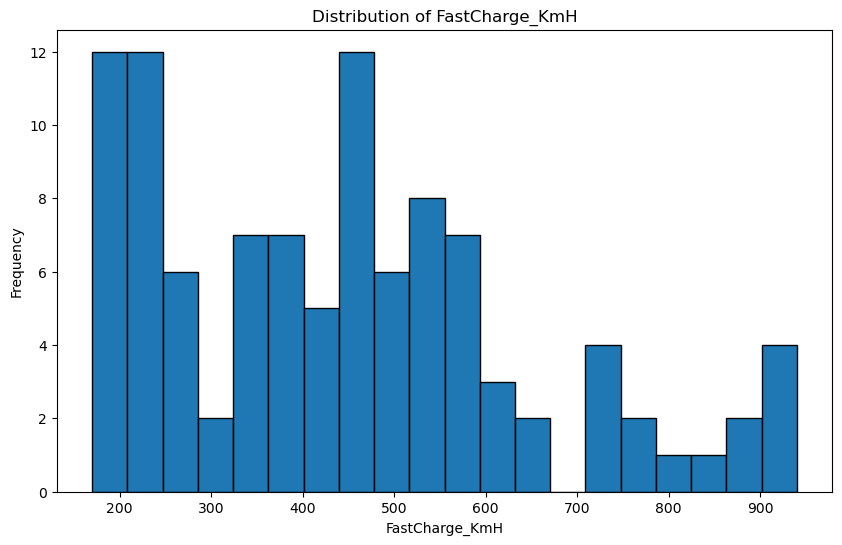

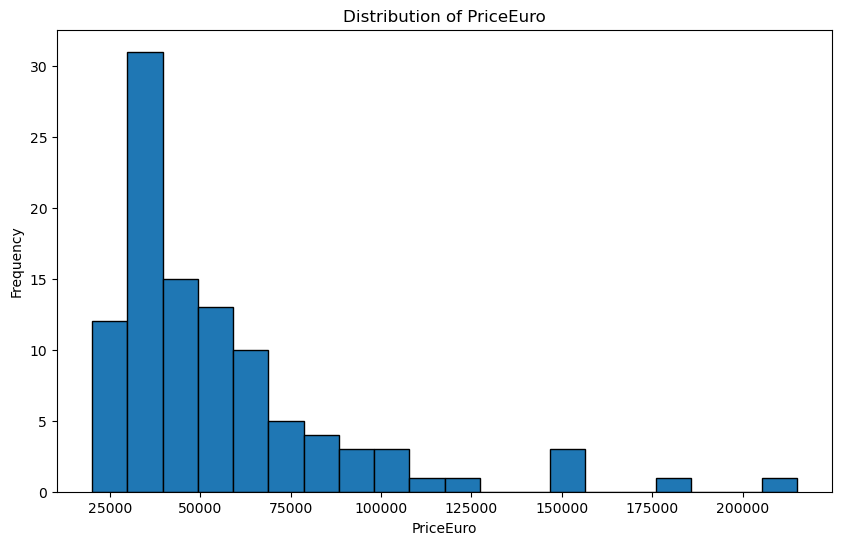

In [15]:
df = pd.read_excel(file_path, sheet_name='1')

# Generate pie charts for categorical columns
categorical_columns = ['RapidCharge', 'PowerTrain', 'Segment', 'Seats']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of ' + column)
    plt.ylabel('')
    plt.savefig(column + '_pie_chart.png')
    plt.show()

numeric_columns = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH', 'PriceEuro']

for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    df[column].plot.hist(bins=20, edgecolor='black')
    plt.title('Distribution of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.savefig(column + '_bar_graph.png')
    plt.show()



In [14]:
df['Segment'].value_counts(normalize=True)

Segment
C    0.291262
B    0.213592
D    0.145631
F    0.116505
E    0.097087
A    0.067961
N    0.058252
S    0.009709
Name: proportion, dtype: float64

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the data
FILEPATH = '3_ev_market_india_dataset.xlsx'
dataframes = pd.read_excel(FILEPATH, sheet_name=None)
df = dataframes['1']  # Assuming we're working with the first sheet

# Display initial information
print(df.info())
print(df.head())

# Identify categorical columns for one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns
print('Categorical columns:', categorical_columns)

# Convert all categorical columns to strings
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Perform one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded columns with numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
final_df = pd.concat([df[numerical_columns], encoded_df], axis=1)

# Save the encoded dataframe
final_df.to_csv('encoded_ev_data.csv', index=False)
print('Encoded dataframe saved as encoded_ev_data.csv')

# Display information about the final dataframe
print(final_df.info())
print(final_df.head())

print('One-hot encoding completed and data saved.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB
None
        Brand                          Model  AccelSec  TopSpeed_KmH  \
0       Tesla  Mode

C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [17]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the encoded data
df = pd.read_csv('encoded_ev_data.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the top 10 highest correlations (excluding self-correlations)
top_correlations = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
top_correlations = top_correlations[top_correlations != 1.0][:10]
print('\
Top 10 highest correlations:')
print(top_correlations)

Top 10 highest correlations:
PriceEuro             TopSpeed_KmH        0.829057
TopSpeed_KmH          FastCharge_KmH      0.785218
                      Range_Km            0.746662
Range_Km              FastCharge_KmH      0.723714
TopSpeed_KmH          PowerTrain_AWD      0.707186
Brand_Peugeot         Model_e-2008 SUV    0.703632
Model_500e Hatchback  Brand_Fiat          0.703632
Model_e Advance       Brand_Honda         0.703632
Model_e               Brand_Honda         0.703632
Segment_N             BodyStyle_Pickup    0.696419
dtype: float64


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the encoded data
df = pd.read_csv('encoded_ev_data.csv')

# 1. Box plots
plt.figure(figsize=(12, 6))
df_numerical.boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('boxplots.png')
plt.close()

# 3. K-means clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Elbow method to find optimal number of clusters
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig('elbow_plot.png')
plt.close()

# Perform K-means clustering with optimal k (let's choose k=3 for this example)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# 4. PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA of EV Data with K-means Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.savefig('pca_clusters.png')
plt.close()

# 5. Analyze clusters
cluster_means = df.groupby('Cluster')[numerical_cols].mean()
print('Cluster Means:')
print(cluster_means)

# 6. Feature importance for clustering
feature_importance = pd.DataFrame({'feature': numerical_cols, 'importance': np.abs(kmeans.cluster_centers_).mean(axis=0)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('\
Feature Importance for Clustering:')
print(feature_importance)

print('EDA and K-means clustering completed. Images saved: pairplot.png, boxplots.png, elbow_plot.png, pca_clusters.png')

C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\VAISHANAVI\AppData\Local\Temp\ipykernel_27488\3432561960.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default val

Cluster Means:
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        9.606250    148.520833  249.166667       171.125000      282.500000   
1        3.855556    249.611111  494.444444       193.111111      743.333333   
2        6.251351    184.729730  379.324324       210.648649      508.648649   

             PriceEuro  
Cluster                 
0         33235.104167  
1        109304.944444  
2         59076.135135  
Feature Importance for Clustering:
           feature  importance
4   FastCharge_KmH    0.862598
1     TopSpeed_KmH    0.819675
5        PriceEuro    0.778508
0         AccelSec    0.765461
2         Range_Km    0.759737
3  Efficiency_WhKm    0.492469
EDA and K-means clustering completed. Images saved: pairplot.png, boxplots.png, elbow_plot.png, pca_clusters.png


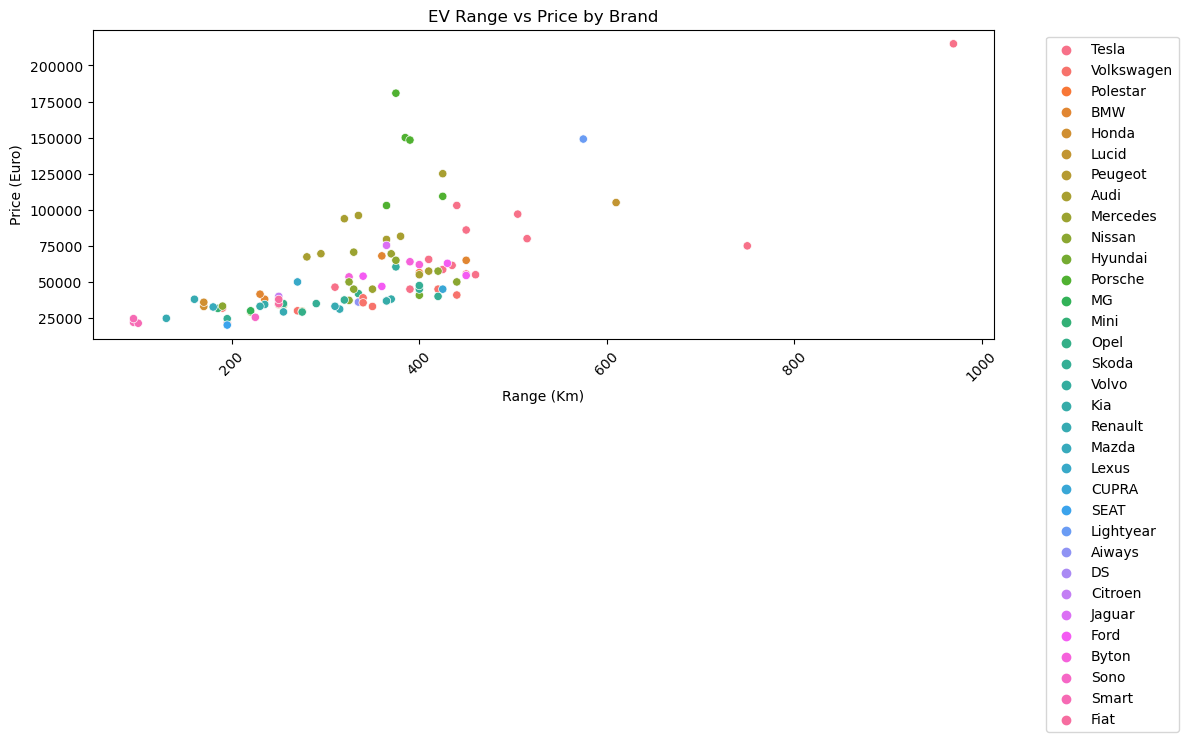

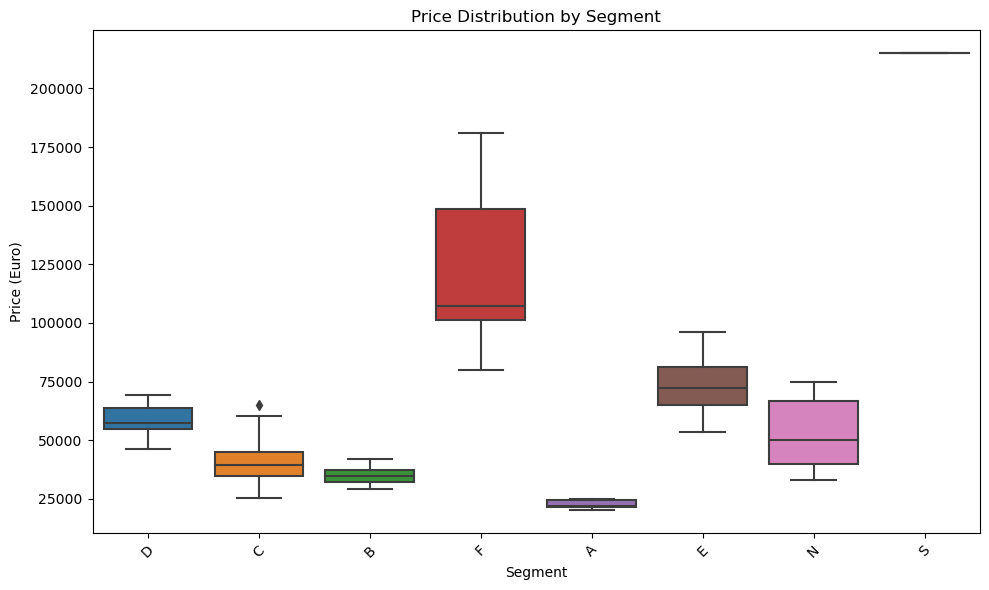

C:\Users\VAISHANAVI\AppData\Local\Temp\ipykernel_27488\3480543212.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Brand', y='Efficiency_WhKm', ci=None)


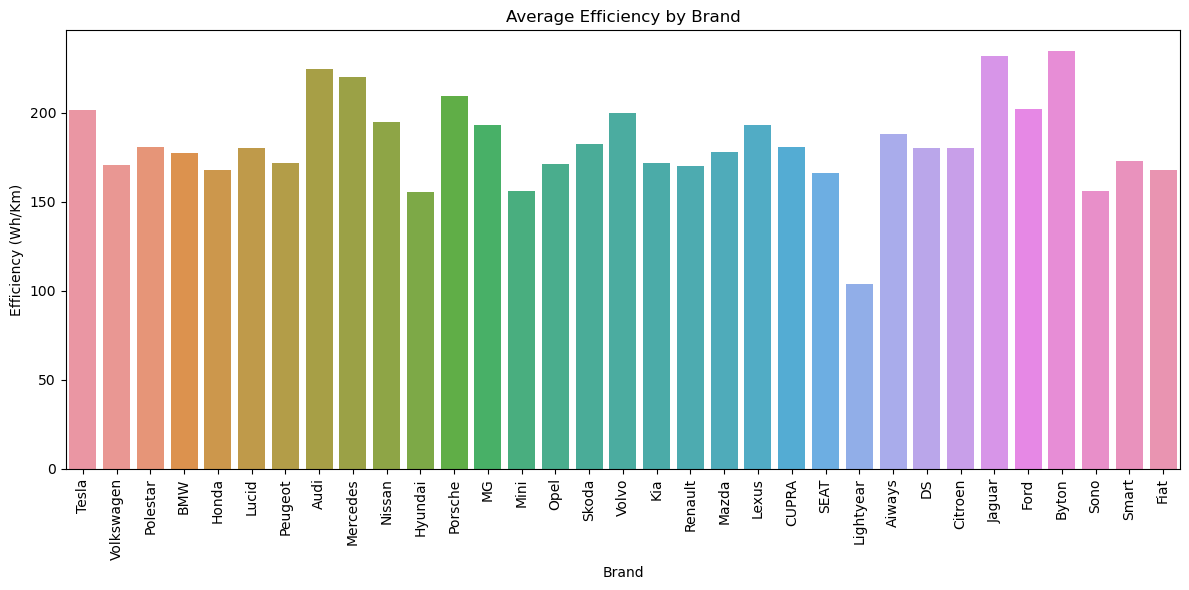

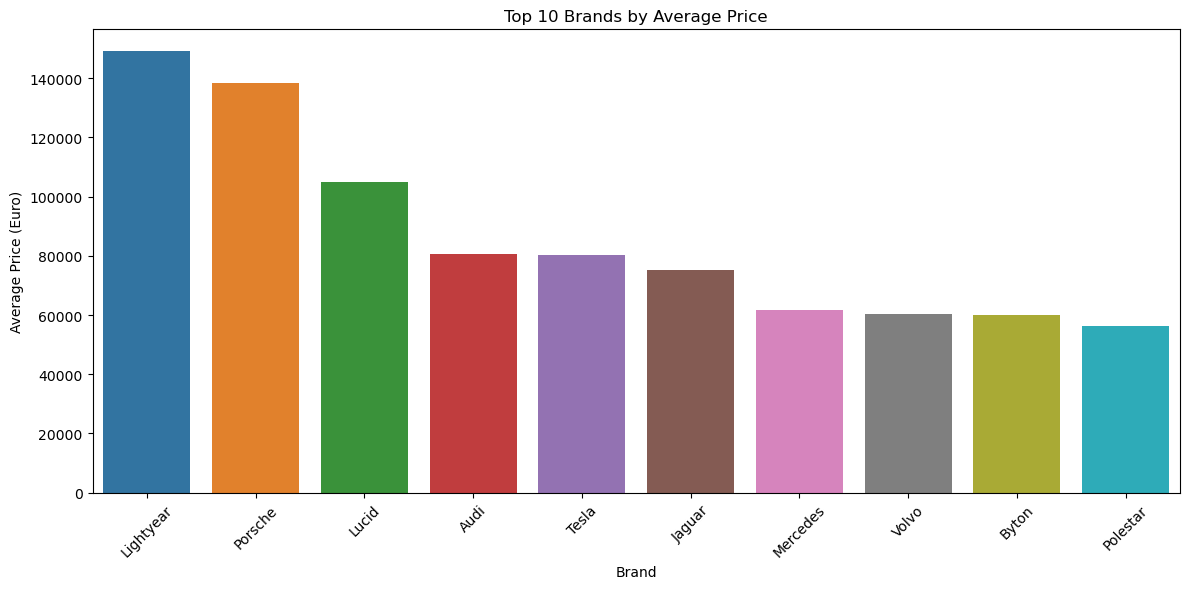

Visualizations generated successfully.


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# Create visualizations
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Range_Km', y='PriceEuro', hue='Brand')
plt.title('EV Range vs Price by Brand')
plt.xlabel('Range (Km)')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Segment', y='PriceEuro')
plt.title('Price Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Price (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Brand', y='Efficiency_WhKm', ci=None)
plt.title('Average Efficiency by Brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency (Wh/Km)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 10 brands by average price
top_10_brands = df.groupby('Brand')['PriceEuro'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_brands.index, y=top_10_brands.values)
plt.title('Top 10 Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price (Euro)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print('Visualizations generated successfully.')

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)


In [23]:
import warnings
warnings.filterwarnings('ignore')
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)


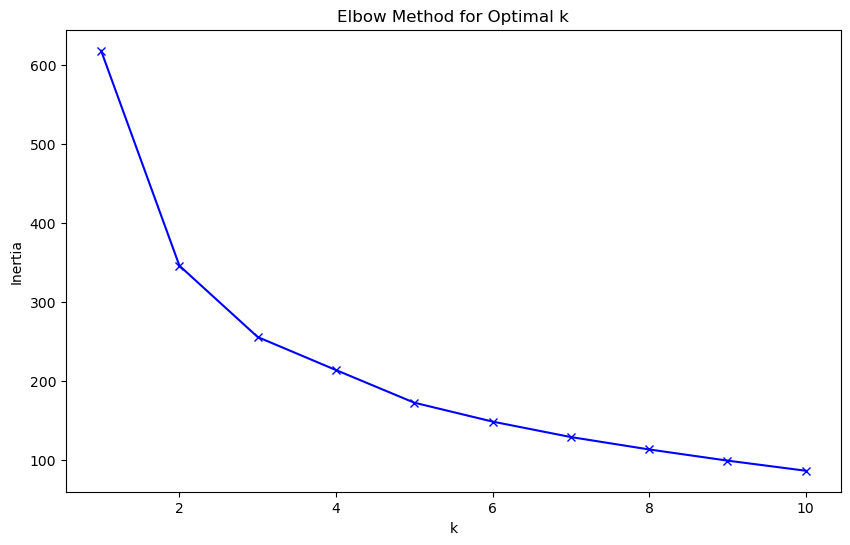

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()  # Show the elbow plot


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


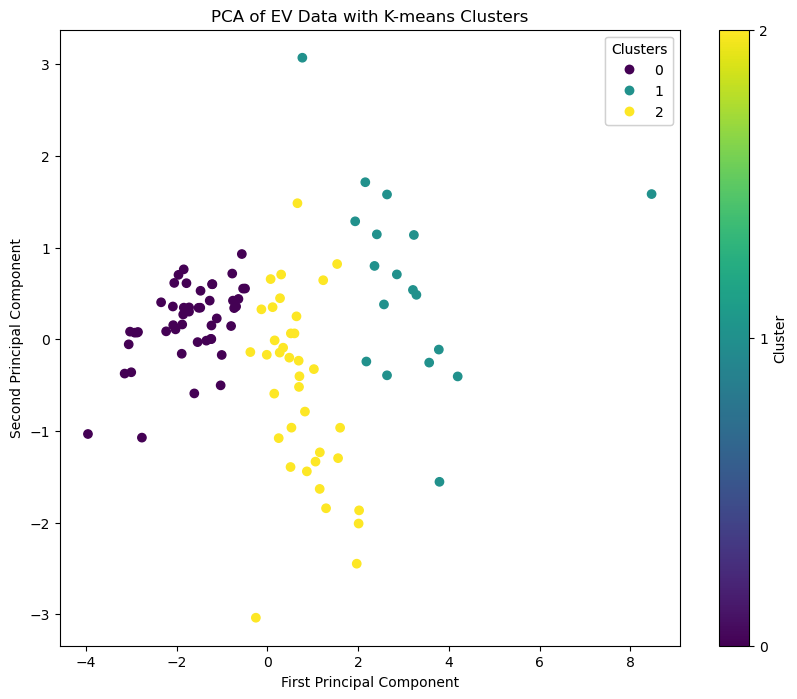

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('PCA of EV Data with K-means Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster')
# Add legend to indicate cluster numbers
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()  # Show the PCA plot
plt.show()  # Show the PCA plot


In [27]:
cluster_means = df.groupby('Cluster')[numerical_cols].mean()
print('Cluster Means:')
print(cluster_means)


Cluster Means:
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
Cluster                                                                        
0        9.606250    148.520833  249.166667       171.125000      282.500000   
1        3.855556    249.611111  494.444444       193.111111      743.333333   
2        6.251351    184.729730  379.324324       210.648649      508.648649   

             PriceEuro  
Cluster                 
0         33235.104167  
1        109304.944444  
2         59076.135135  


In [28]:
feature_importance = pd.DataFrame({'feature': numerical_cols, 'importance': np.abs(kmeans.cluster_centers_).mean(axis=0)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('Feature Importance for Clustering:')
print(feature_importance)

print('EDA and K-means clustering completed.')


Feature Importance for Clustering:
           feature  importance
4   FastCharge_KmH    0.862598
1     TopSpeed_KmH    0.819675
5        PriceEuro    0.778508
0         AccelSec    0.765461
2         Range_Km    0.759737
3  Efficiency_WhKm    0.492469
EDA and K-means clustering completed.


# INSIGHTS INTO THE DATA


In [31]:
# Cluster 0:
# Acceleration (0-100 km/h): 6.25 seconds
# Top Speed: 184.73 km/h
# Range: 379.32 km
# Efficiency: 210.65 Wh/km
# Fast Charge Speed: 508.65 km/h
# Price: €59,076.14

# Cluster 1:
# Acceleration (0-100 km/h): 9.61 seconds
# Top Speed: 148.52 km/h
# Range: 249.17 km
# Efficiency: 171.13 Wh/km
# Fast Charge Speed: 282.50 km/h
# Price: €33,235.10

# Cluster 2:
# Acceleration (0-100 km/h): 3.86 seconds
# Top Speed: 249.61 km/h
# Range: 494.44 km
# Efficiency: 193.11 Wh/km
# Fast Charge Speed: 743.33 km/h
# Price: €109,304.94

# Insights from Cluster Means
# Cluster 0 represents mid-range vehicles with moderate performance, range, and price.
# Cluster 1 represents budget-friendly vehicles with lower performance and range.
# Cluster 2 represents high-end vehicles with superior performance, range, and price.
